In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pysynphot as S
from scipy.interpolate import interp1d
from astropy.io import fits

# allow interactive plots
%matplotlib widget

In [2]:
input_dir = 'output_files/'

In [3]:
variable_param = 'pwv'
am0 = 1.2
cloud0 = 0.0

In [4]:
colour_dict = np.load(os.path.join(input_dir,'colour_dict_varying_{0}_airmass_{1}_cloud_{2}.npy'.format(variable_param,am0,cloud0)),allow_pickle=True).ravel()[0]
colour_dict_ref = np.load(os.path.join(input_dir,'colour_dict_varying_{0}_airmass_{1}_cloud_{2}_ref.npy'.format(variable_param,am0,cloud0)),allow_pickle=True).ravel()[0]

In [5]:
atm_vals = np.load(os.path.join(input_dir,'atm_vals_{0}_airmass_{1}_cloud_{2}.npy'.format(variable_param,am0,cloud0)),allow_pickle=True).ravel()

In [6]:
spectral_types = ['O','B','A','F','G','K','M']
type_colors = {'O':'violet','B':'cyan','A':'b','F':'g','G':'y','K':'orange','M':'r'}
type_markers = {'O':'s','B':'x','A':'o','F':'v','G':'^','K':'P','M':'*'}

Let's see the correlation between the three reddest colours: 

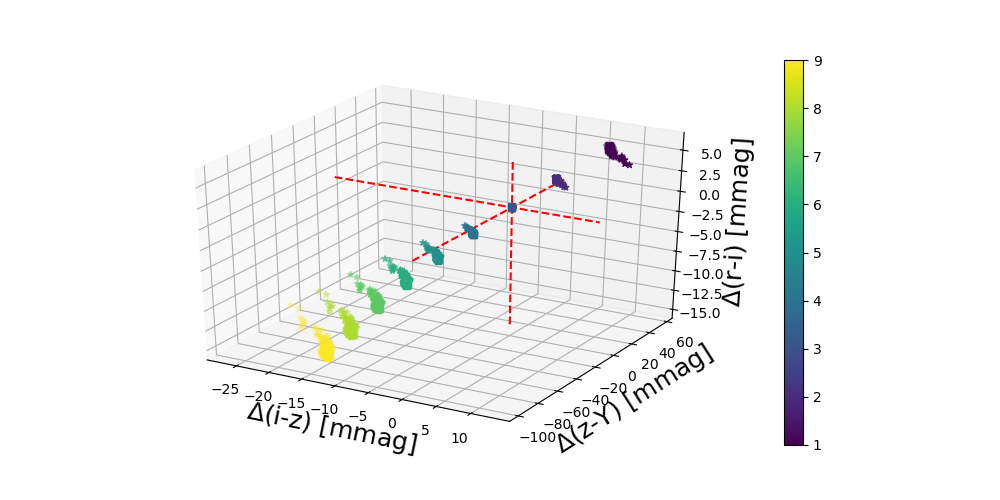

In [7]:
colorx = 'i-z'
colory = 'z-Y'
colorz = 'r-i'

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')

minx, maxx = [], []
miny, maxy = [], []
minz, maxz = [], []
i = 0
for spec_type in spectral_types:
    for si in colour_dict[spec_type]:
        delta1 = (colour_dict[spec_type][si][colorx.lower()]-colour_dict_ref[spec_type][si][colorx.lower()])*1000.
        delta2 = (colour_dict[spec_type][si][colory.lower()]-colour_dict_ref[spec_type][si][colory.lower()])*1000.
        delta3 = (colour_dict[spec_type][si][colorz.lower()]-colour_dict_ref[spec_type][si][colorz.lower()])*1000.
        
        if i==0:
            im = ax.scatter(delta1,delta2,delta3,c=atm_vals,marker=type_markers[spec_type])
        else:
            ax.scatter(delta1,delta2,delta3,c=atm_vals,marker=type_markers[spec_type])
        
        minx.append(np.min(delta1))
        miny.append(np.min(delta2))
        minz.append(np.min(delta3))
        maxx.append(np.max(delta1))
        maxy.append(np.max(delta2))
        maxz.append(np.max(delta3))
        
        i += 1

ax.set_xlabel(r'$\Delta$'+'('+colorx+') [mmag]',fontsize=18)
ax.set_ylabel(r'$\Delta$'+'('+colory+') [mmag]',fontsize=18)
ax.set_zlabel(r'$\Delta$'+'('+colorz+') [mmag]',fontsize=18)

xrange = np.linspace(np.min(minx),np.max(maxx),100)
yrange = np.linspace(np.min(miny),np.max(maxy),100)
zrange = np.linspace(np.min(minz),np.max(maxz),100)

ax.plot(xrange,np.zeros(len(yrange)),np.zeros(len(zrange)),'r--')
ax.plot(np.zeros(len(xrange)),yrange,np.zeros(len(zrange)),'r--')
ax.plot(np.zeros(len(xrange)),np.zeros(len(yrange)),zrange,'r--')

plt.colorbar(im, ax=ax)

We can plot the colours in an alternative way: 

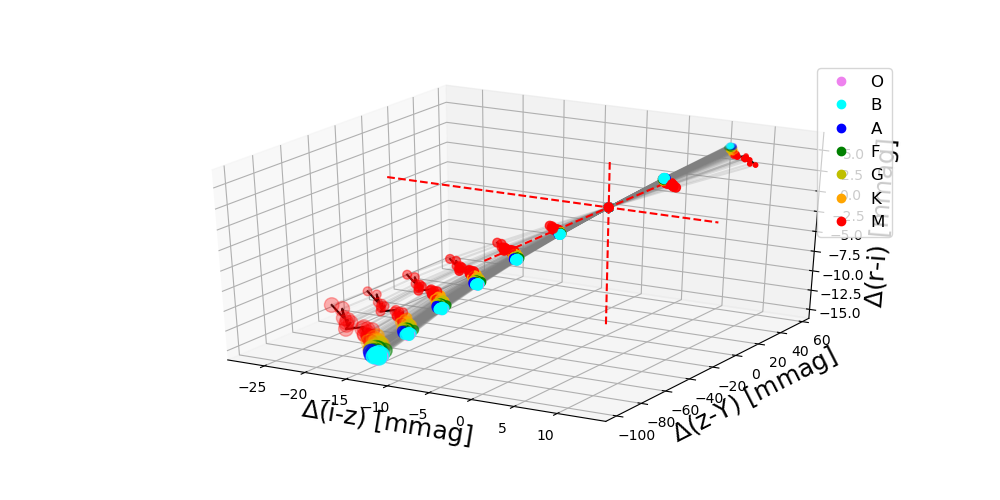

In [8]:
colorx = 'i-z'
colory = 'z-Y'
colorz = 'r-i'

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')

minx, maxx = [], []
miny, maxy = [], []
minz, maxz = [], []

iso_vals1 = []
iso_vals2 = []
iso_vals3 = []
for spec_type in spectral_types:
    for si in colour_dict[spec_type]:
        delta1 = (colour_dict[spec_type][si][colorx.lower()]-colour_dict_ref[spec_type][si][colorx.lower()])*1000.
        delta2 = (colour_dict[spec_type][si][colory.lower()]-colour_dict_ref[spec_type][si][colory.lower()])*1000.
        delta3 = (colour_dict[spec_type][si][colorz.lower()]-colour_dict_ref[spec_type][si][colorz.lower()])*1000.
        
        msize = [10.]
        msize = msize+[40.]*(len(delta1)-2)
        msize.append(110.)
        
        ax.scatter(delta1,delta2,delta3,c=type_colors[spec_type],marker='o',s=msize)
        ax.plot(delta1,delta2,delta3,ls='-',marker='',color='grey',alpha=0.2)
        
        minx.append(np.min(delta1))
        miny.append(np.min(delta2))
        minz.append(np.min(delta3))
        maxx.append(np.max(delta1))
        maxy.append(np.max(delta2))
        maxz.append(np.max(delta3))
        
        iso_vals1.append(delta1)
        iso_vals2.append(delta2)
        iso_vals3.append(delta3)
        
    ax.plot([],[],c=type_colors[spec_type],ls='',marker='o',label=spec_type)
        
iso_vals1 = np.array(iso_vals1)
iso_vals2 = np.array(iso_vals2)
iso_vals3 = np.array(iso_vals3)
for val in range(iso_vals1.shape[1]):
    #print(iso_vals1[:,val])
    sort_index = np.argsort(iso_vals1[:,val])
    ax.plot(iso_vals1[:,val][sort_index],iso_vals2[:,val][sort_index],iso_vals3[:,val][sort_index],ls='-',marker='',color='k',zorder=-1)
        

ax.set_xlabel(r'$\Delta$'+'('+colorx+') [mmag]',fontsize=18)
ax.set_ylabel(r'$\Delta$'+'('+colory+') [mmag]',fontsize=18)
ax.set_zlabel(r'$\Delta$'+'('+colorz+') [mmag]',fontsize=18)

xrange = np.linspace(np.min(minx),np.max(maxx),100)
yrange = np.linspace(np.min(miny),np.max(maxy),100)
zrange = np.linspace(np.min(minz),np.max(maxz),100)

ax.plot(xrange,np.zeros(len(yrange)),np.zeros(len(zrange)),'r--')
ax.plot(np.zeros(len(xrange)),yrange,np.zeros(len(zrange)),'r--')
ax.plot(np.zeros(len(xrange)),np.zeros(len(yrange)),zrange,'r--')

ax.legend(fontsize=12)

Now let's look at the correlation of the colours considering only the reference atmosphere, $c_0$. This way we can evaluate how close are the colours of different stars for a standard atmosphere and infer if stars that are close in this reference case are still close when we change to other atmospheric parameter values 

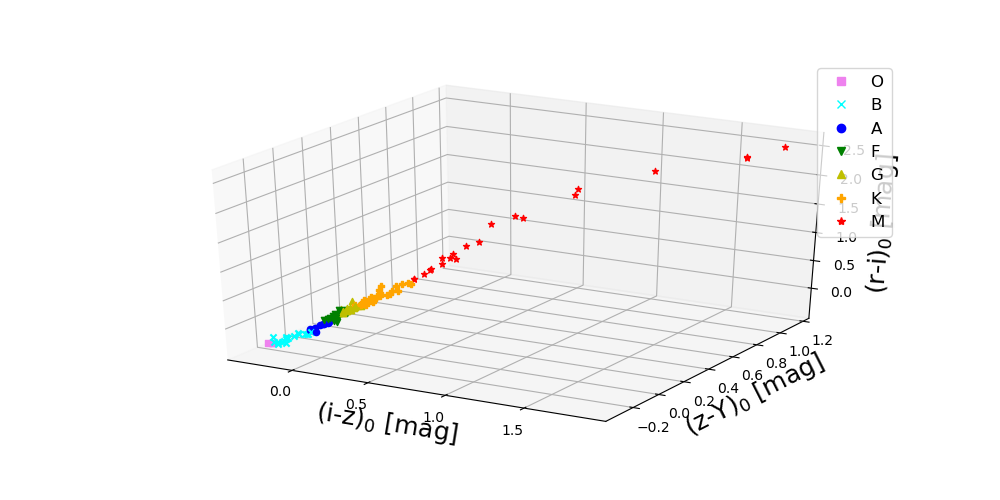

In [9]:
colorx = 'i-z'
colory = 'z-Y'
colorz = 'r-i'

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')

for spec_type in spectral_types:
    for si in colour_dict[spec_type]:
        color1 = colour_dict_ref[spec_type][si][colorx.lower()]
        color2 = colour_dict_ref[spec_type][si][colory.lower()]
        color3 = colour_dict_ref[spec_type][si][colorz.lower()]
        
        ax.scatter(color1,color2,color3,c=type_colors[spec_type],marker=type_markers[spec_type])
    ax.plot([],[],ls='',marker=type_markers[spec_type],color=type_colors[spec_type],label=spec_type)

ax.set_xlabel('('+colorx+r'$)_0$ [mag]',fontsize=18)
ax.set_ylabel('('+colory+r'$)_0$ [mag]',fontsize=18)
ax.set_zlabel('('+colorz+r'$)_0$ [mag]',fontsize=18)
ax.legend(fontsize=12)


There is a clear correlation between the three reddest colours. Then, we can in principle characterize with only one colour the impact of PWV (our current case) and the correction that we need to apply. Let's look at this in 2D to further confirm it: 

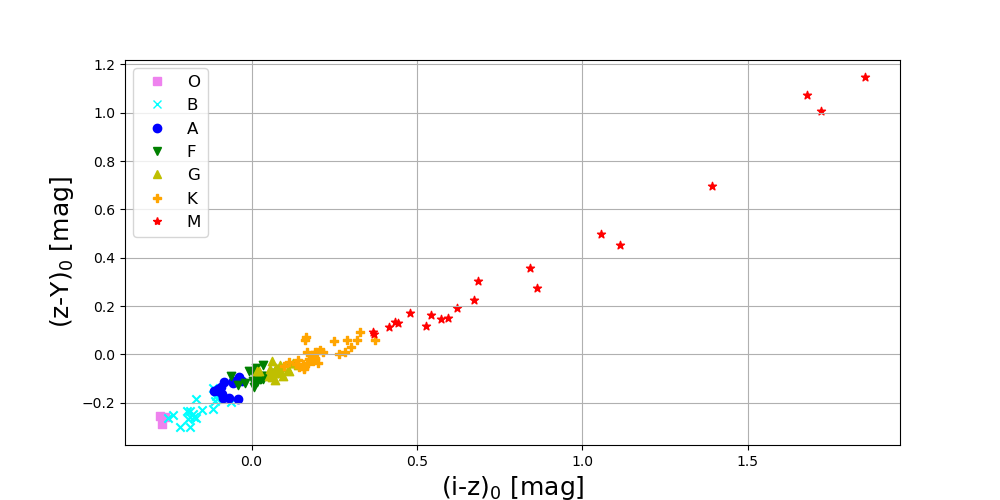

In [10]:
colorx = 'i-z'
colory = 'z-Y'

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

for spec_type in spectral_types:
    for si in colour_dict[spec_type]:
        color1 = colour_dict_ref[spec_type][si][colorx.lower()]
        color2 = colour_dict_ref[spec_type][si][colory.lower()]

        ax.scatter(color1,color2,c=type_colors[spec_type],marker=type_markers[spec_type])
        
    ax.plot([],[],ls='',marker=type_markers[spec_type],color=type_colors[spec_type],label=spec_type)

ax.grid()
ax.set_xlabel('('+colorx+r'$)_0$ [mag]',fontsize=18)
ax.set_ylabel('('+colory+r'$)_0$ [mag]',fontsize=18)
ax.legend(fontsize=12)


Now we focus on the two M type stars with $(i-z)_0 \sim 1.7$ and $(z-Y)_0 \sim 1.1$. They are close in this color space for the standard atmosphere, so the question is whether they keep close for other PWV values. To check this, we go back to the 3D $\Delta c$ space 

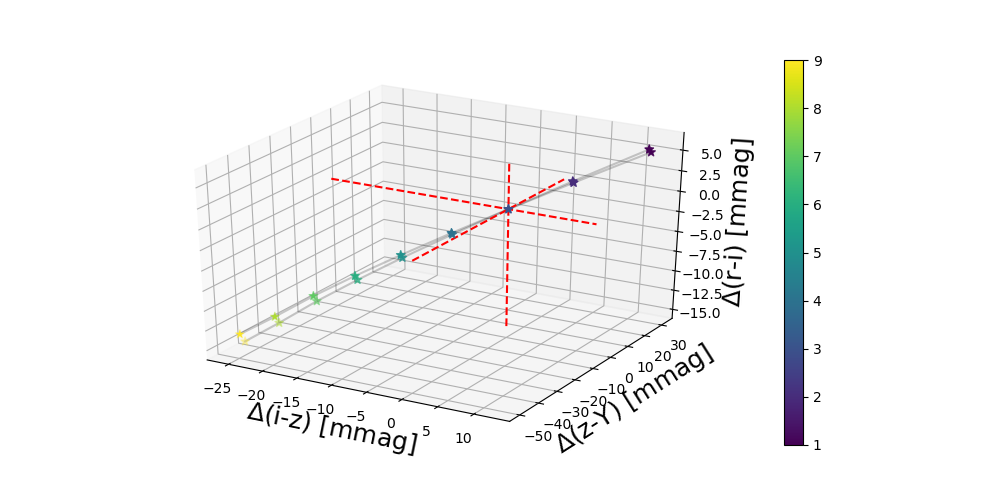

In [11]:
colorx = 'i-z'
colory = 'z-Y'
colorz = 'r-i'

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')

minx, maxx = [], []
miny, maxy = [], []
minz, maxz = [], []

spec_type = 'M'
for si in colour_dict[spec_type]:
    #mask1 = (colour_dict_ref[spec_type][si][colorx.lower()]>1.6)*(colour_dict_ref[spec_type][si][colorx.lower()]<1.8)
    i = 0
    if (colour_dict_ref[spec_type][si][colorx.lower()]>1.6) and (colour_dict_ref[spec_type][si][colorx.lower()]<1.8):
        delta1 = (colour_dict[spec_type][si][colorx.lower()]-colour_dict_ref[spec_type][si][colorx.lower()])*1000.
        delta2 = (colour_dict[spec_type][si][colory.lower()]-colour_dict_ref[spec_type][si][colory.lower()])*1000.
        delta3 = (colour_dict[spec_type][si][colorz.lower()]-colour_dict_ref[spec_type][si][colorz.lower()])*1000.
        
        if i==0:
            im = ax.scatter(delta1,delta2,delta3,c=atm_vals,marker=type_markers[spec_type],s=40)
        else:
            ax.scatter(delta1,delta2,delta3,c=atm_vals,marker=type_markers[spec_type],s=40)
        ax.plot(delta1,delta2,delta3,ls='-',marker='',color='k',alpha=0.2)
    
        minx.append(np.min(delta1))
        miny.append(np.min(delta2))
        minz.append(np.min(delta3))
        maxx.append(np.max(delta1))
        maxy.append(np.max(delta2))
        maxz.append(np.max(delta3))
        
        i += 1

ax.set_xlabel(r'$\Delta$'+'('+colorx+') [mmag]',fontsize=18)
ax.set_ylabel(r'$\Delta$'+'('+colory+') [mmag]',fontsize=18)
ax.set_zlabel(r'$\Delta$'+'('+colorz+') [mmag]',fontsize=18)

xrange = np.linspace(np.min(minx),np.max(maxx),100)
yrange = np.linspace(np.min(miny),np.max(maxy),100)
zrange = np.linspace(np.min(minz),np.max(maxz),100)

ax.plot(xrange,np.zeros(len(yrange)),np.zeros(len(zrange)),'r--')
ax.plot(np.zeros(len(xrange)),yrange,np.zeros(len(zrange)),'r--')
ax.plot(np.zeros(len(xrange)),np.zeros(len(yrange)),zrange,'r--')

plt.colorbar(im, ax=ax)

We can see that the trajectories of both stars remain very close, so it seems that close object in the color space at the standard atmosphere remain close at other atmospheres. If we now look at the trajectories of all M stars:  

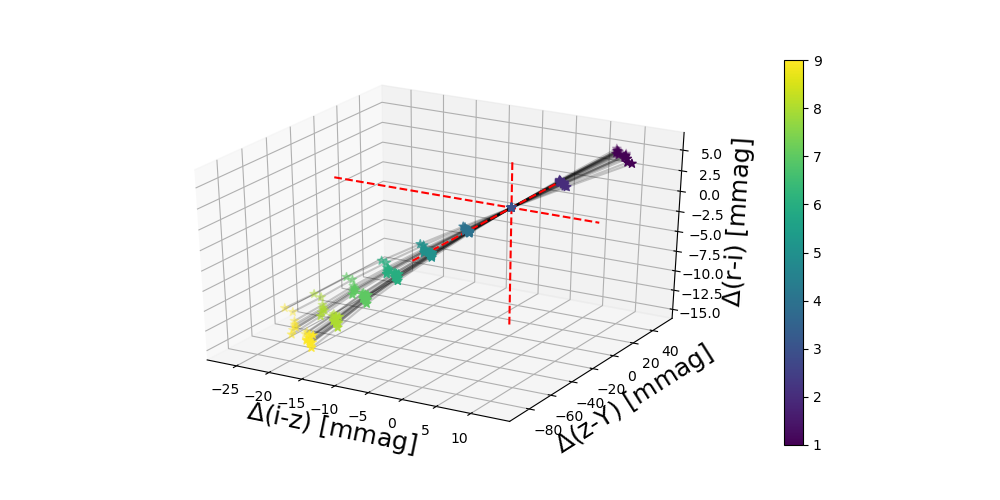

In [21]:
colorx = 'i-z'
colory = 'z-Y'
colorz = 'r-i'

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')

minx, maxx = [], []
miny, maxy = [], []
minz, maxz = [], []

spec_type = 'M'
for si in colour_dict[spec_type]:
    #mask1 = (colour_dict_ref[spec_type][si][colorx.lower()]>1.6)*(colour_dict_ref[spec_type][si][colorx.lower()]<1.8)
    i = 0
    if True:
        delta1 = (colour_dict[spec_type][si][colorx.lower()]-colour_dict_ref[spec_type][si][colorx.lower()])*1000.
        delta2 = (colour_dict[spec_type][si][colory.lower()]-colour_dict_ref[spec_type][si][colory.lower()])*1000.
        delta3 = (colour_dict[spec_type][si][colorz.lower()]-colour_dict_ref[spec_type][si][colorz.lower()])*1000.
        
        if i==0:
            im = ax.scatter(delta1,delta2,delta3,c=atm_vals,marker=type_markers[spec_type],s=40)
        else:
            ax.scatter(delta1,delta2,delta3,c=atm_vals,marker=type_markers[spec_type],s=40)
        ax.plot(delta1,delta2,delta3,ls='-',marker='',color='k',alpha=0.2)
    
        minx.append(np.min(delta1))
        miny.append(np.min(delta2))
        minz.append(np.min(delta3))
        maxx.append(np.max(delta1))
        maxy.append(np.max(delta2))
        maxz.append(np.max(delta3))
        
        i += 1

ax.set_xlabel(r'$\Delta$'+'('+colorx+') [mmag]',fontsize=18)
ax.set_ylabel(r'$\Delta$'+'('+colory+') [mmag]',fontsize=18)
ax.set_zlabel(r'$\Delta$'+'('+colorz+') [mmag]',fontsize=18)

xrange = np.linspace(np.min(minx),np.max(maxx),100)
yrange = np.linspace(np.min(miny),np.max(maxy),100)
zrange = np.linspace(np.min(minz),np.max(maxz),100)

ax.plot(xrange,np.zeros(len(yrange)),np.zeros(len(zrange)),'r--')
ax.plot(np.zeros(len(xrange)),yrange,np.zeros(len(zrange)),'r--')
ax.plot(np.zeros(len(xrange)),np.zeros(len(yrange)),zrange,'r--')

plt.colorbar(im, ax=ax)

The scattering of these stars' colors results in a variety of color corrections contained more or less within the same plane of this 3D color space 

Here, we look at the "absolute" color correction applied to each M type star, in the sense that we do not refer it to the standard atmosphere 

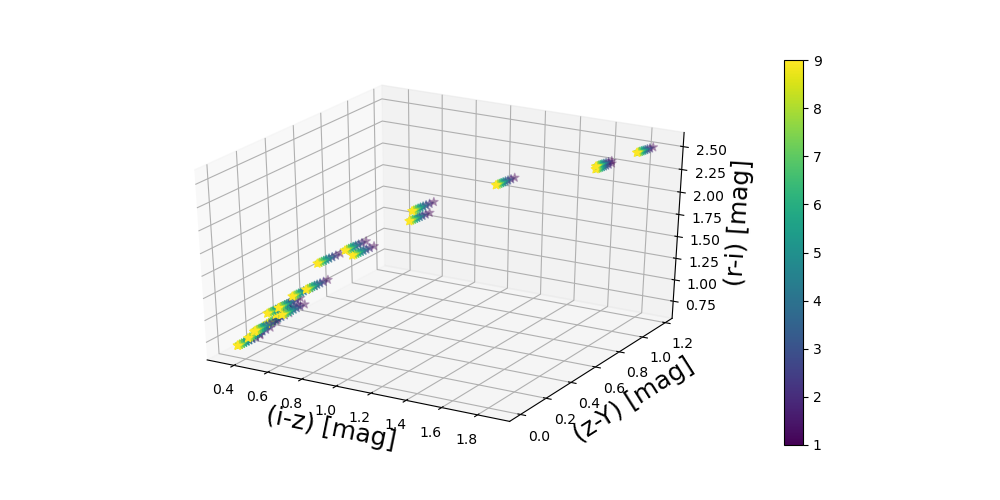

In [22]:
colorx = 'i-z'
colory = 'z-Y'
colorz = 'r-i'

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')

minx, maxx = [], []
miny, maxy = [], []
minz, maxz = [], []

spec_type = 'M'
for si in colour_dict[spec_type]:
    #mask1 = (colour_dict_ref[spec_type][si][colorx.lower()]>1.6)*(colour_dict_ref[spec_type][si][colorx.lower()]<1.8)
    i = 0
    if True:
        delta1 = colour_dict[spec_type][si][colorx.lower()]
        delta2 = colour_dict[spec_type][si][colory.lower()]
        delta3 = colour_dict[spec_type][si][colorz.lower()]
        
        if i==0:
            im = ax.scatter(delta1,delta2,delta3,c=atm_vals,marker=type_markers[spec_type],s=40)
        else:
            ax.scatter(delta1,delta2,delta3,c=atm_vals,marker=type_markers[spec_type],s=40)
        ax.plot(delta1,delta2,delta3,ls='-',marker='',color='k',alpha=0.2)
    
        minx.append(np.min(delta1))
        miny.append(np.min(delta2))
        minz.append(np.min(delta3))
        maxx.append(np.max(delta1))
        maxy.append(np.max(delta2))
        maxz.append(np.max(delta3))
        
        i += 1

ax.set_xlabel('('+colorx+') [mag]',fontsize=18)
ax.set_ylabel('('+colory+') [mag]',fontsize=18)
ax.set_zlabel('('+colorz+') [mag]',fontsize=18)

xrange = np.linspace(np.min(minx),np.max(maxx),100)
yrange = np.linspace(np.min(miny),np.max(maxy),100)
zrange = np.linspace(np.min(minz),np.max(maxz),100)

#ax.plot(xrange,np.zeros(len(yrange)),np.zeros(len(zrange)),'r--')
#ax.plot(np.zeros(len(xrange)),yrange,np.zeros(len(zrange)),'r--')
#ax.plot(np.zeros(len(xrange)),np.zeros(len(yrange)),zrange,'r--')

plt.colorbar(im, ax=ax)

Now, let's place the colours of the SNe Ia to see where do they lie in 

In [12]:
sn_colour_dict = np.load(os.path.join(input_dir,'sn_colour_dict_varying_{0}_airmass_{1}_cloud_{2}.npy'.format(variable_param,am0,cloud0)),allow_pickle=True).ravel()[0]
sn_colour_dict_ref = np.load(os.path.join(input_dir,'sn_colour_dict_varying_{0}_airmass_{1}_cloud_{2}_ref.npy'.format(variable_param,am0,cloud0)),allow_pickle=True).ravel()[0]

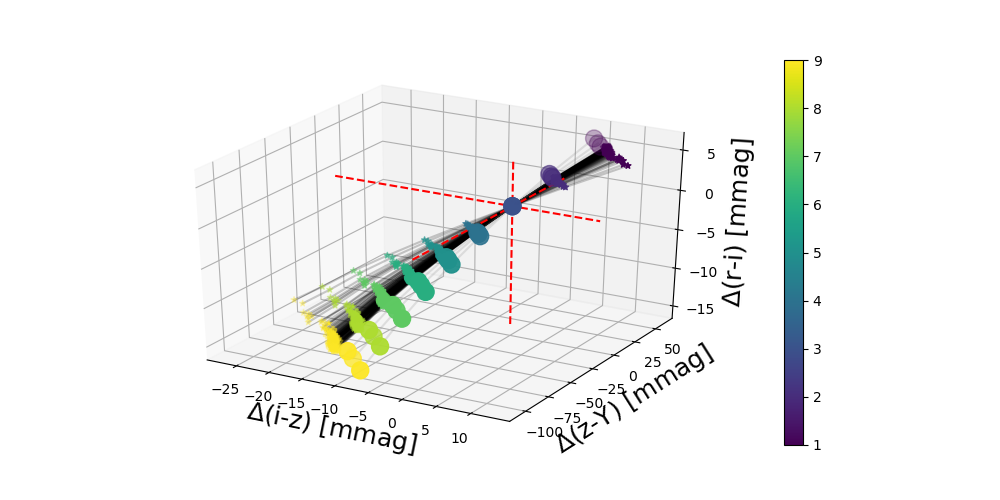

In [13]:
colorx = 'i-z'
colory = 'z-Y'
colorz = 'r-i'

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')

minx, maxx = [], []
miny, maxy = [], []
minz, maxz = [], []

i = 0
for spec_type in spectral_types:
    for si in colour_dict[spec_type]:
        delta1 = (colour_dict[spec_type][si][colorx.lower()]-colour_dict_ref[spec_type][si][colorx.lower()])*1000.
        delta2 = (colour_dict[spec_type][si][colory.lower()]-colour_dict_ref[spec_type][si][colory.lower()])*1000.
        delta3 = (colour_dict[spec_type][si][colorz.lower()]-colour_dict_ref[spec_type][si][colorz.lower()])*1000.
        
        if i==0:
            im = ax.scatter(delta1,delta2,delta3,c=atm_vals,marker=type_markers[spec_type])
        else:
            ax.scatter(delta1,delta2,delta3,c=atm_vals,marker=type_markers[spec_type])
        
        ax.plot(delta1,delta2,delta3,ls='-',marker='',color='k',alpha=0.2)
        
        minx.append(np.min(delta1))
        miny.append(np.min(delta2))
        minz.append(np.min(delta3))
        maxx.append(np.max(delta1))
        maxy.append(np.max(delta2))
        maxz.append(np.max(delta3))
        
for sn in sn_colour_dict.keys():
    delta1_sn = (sn_colour_dict[sn][colorx.lower()]-sn_colour_dict_ref[sn][colorx.lower()])*1000.
    delta2_sn = (sn_colour_dict[sn][colory.lower()]-sn_colour_dict_ref[sn][colory.lower()])*1000.
    delta3_sn = (sn_colour_dict[sn][colorz.lower()]-sn_colour_dict_ref[sn][colorz.lower()])*1000.
    
    ax.scatter(delta1_sn,delta2_sn,delta3_sn,c=atm_vals,marker='o',s=150.0)
    ax.plot(delta1_sn,delta2_sn,delta3_sn,ls='-',marker='',color='grey',alpha=0.2)
    
    minx.append(np.min(delta1_sn))
    miny.append(np.min(delta2_sn))
    minz.append(np.min(delta3_sn))
    maxx.append(np.max(delta1_sn))
    maxy.append(np.max(delta2_sn))
    maxz.append(np.max(delta3_sn))

ax.set_xlabel(r'$\Delta$'+'('+colorx+') [mmag]',fontsize=18)
ax.set_ylabel(r'$\Delta$'+'('+colory+') [mmag]',fontsize=18)
ax.set_zlabel(r'$\Delta$'+'('+colorz+') [mmag]',fontsize=18)

xrange = np.linspace(np.min(minx),np.max(maxx),100)
yrange = np.linspace(np.min(miny),np.max(maxy),100)
zrange = np.linspace(np.min(minz),np.max(maxz),100)

ax.plot(xrange,np.zeros(len(yrange)),np.zeros(len(zrange)),'r--')
ax.plot(np.zeros(len(xrange)),yrange,np.zeros(len(zrange)),'r--')
ax.plot(np.zeros(len(xrange)),np.zeros(len(yrange)),zrange,'r--')
plt.colorbar(im, ax=ax)


Looking only at the evolution of the SNe Ia colours: 

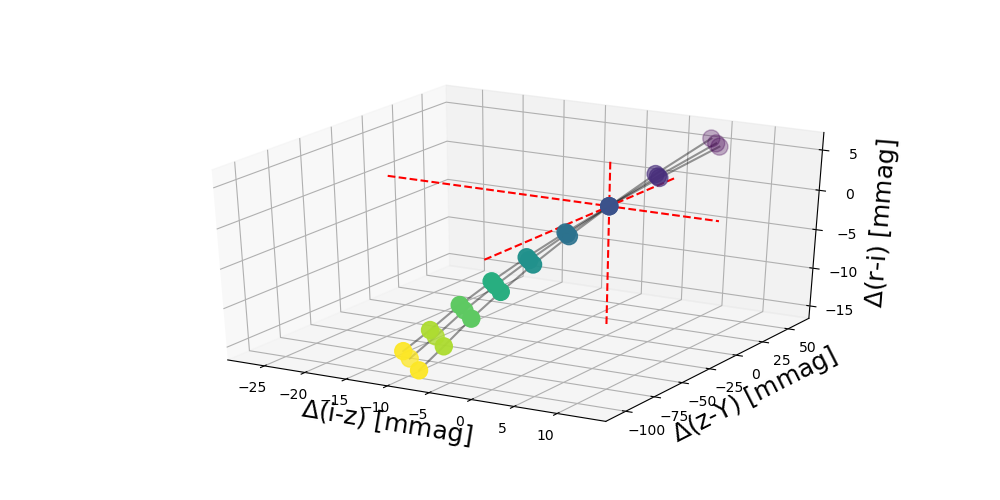

In [14]:
colorx = 'i-z'
colory = 'z-Y'
colorz = 'r-i'

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')

minx, maxx = [], []
miny, maxy = [], []
minz, maxz = [], []
for spec_type in spectral_types:
    for si in colour_dict[spec_type]:
        delta1 = (colour_dict[spec_type][si][colorx.lower()]-colour_dict_ref[spec_type][si][colorx.lower()])*1000.
        delta2 = (colour_dict[spec_type][si][colory.lower()]-colour_dict_ref[spec_type][si][colory.lower()])*1000.
        delta3 = (colour_dict[spec_type][si][colorz.lower()]-colour_dict_ref[spec_type][si][colorz.lower()])*1000.

        #ax.scatter(delta1,delta2,delta3,c=atm_vals,marker=type_markers[spec_type])
        minx.append(np.min(delta1))
        miny.append(np.min(delta2))
        minz.append(np.min(delta3))
        maxx.append(np.max(delta1))
        maxy.append(np.max(delta2))
        maxz.append(np.max(delta3))
        
for sn in sn_colour_dict.keys():
    delta1_sn = (sn_colour_dict[sn][colorx.lower()]-sn_colour_dict_ref[sn][colorx.lower()])*1000.
    delta2_sn = (sn_colour_dict[sn][colory.lower()]-sn_colour_dict_ref[sn][colory.lower()])*1000.
    delta3_sn = (sn_colour_dict[sn][colorz.lower()]-sn_colour_dict_ref[sn][colorz.lower()])*1000.
    
    ax.scatter(delta1_sn,delta2_sn,delta3_sn,c=atm_vals,marker='o',s=150.0)
    ax.plot(delta1_sn,delta2_sn,delta3_sn,ls='-',marker='',color='k',alpha=0.4)
    
    minx.append(np.min(delta1_sn))
    miny.append(np.min(delta2_sn))
    minz.append(np.min(delta3_sn))
    maxx.append(np.max(delta1_sn))
    maxy.append(np.max(delta2_sn))
    maxz.append(np.max(delta3_sn))

ax.set_xlabel(r'$\Delta$'+'('+colorx+') [mmag]',fontsize=18)
ax.set_ylabel(r'$\Delta$'+'('+colory+') [mmag]',fontsize=18)
ax.set_zlabel(r'$\Delta$'+'('+colorz+') [mmag]',fontsize=18)

xrange = np.linspace(np.min(minx),np.max(maxx),100)
yrange = np.linspace(np.min(miny),np.max(maxy),100)
zrange = np.linspace(np.min(minz),np.max(maxz),100)

ax.plot(xrange,np.zeros(len(yrange)),np.zeros(len(zrange)),'r--')
ax.plot(np.zeros(len(xrange)),yrange,np.zeros(len(zrange)),'r--')
ax.plot(np.zeros(len(xrange)),np.zeros(len(yrange)),zrange,'r--')


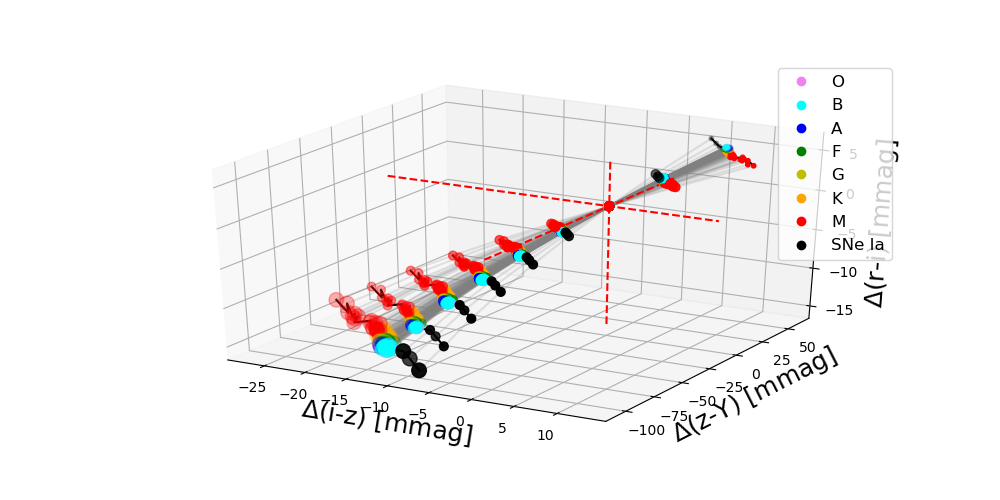

In [20]:
colorx = 'i-z'
colory = 'z-Y'
colorz = 'r-i'

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')

minx, maxx = [], []
miny, maxy = [], []
minz, maxz = [], []

iso_vals1 = []
iso_vals2 = []
iso_vals3 = []
for spec_type in spectral_types:
    for si in colour_dict[spec_type]:
        delta1 = (colour_dict[spec_type][si][colorx.lower()]-colour_dict_ref[spec_type][si][colorx.lower()])*1000.
        delta2 = (colour_dict[spec_type][si][colory.lower()]-colour_dict_ref[spec_type][si][colory.lower()])*1000.
        delta3 = (colour_dict[spec_type][si][colorz.lower()]-colour_dict_ref[spec_type][si][colorz.lower()])*1000.
        
        msize = [10.]
        msize = msize+[40.]*(len(delta1)-2)
        msize.append(110.)
        
        ax.scatter(delta1,delta2,delta3,c=type_colors[spec_type],marker='o',s=msize)
        ax.plot(delta1,delta2,delta3,ls='-',marker='',color='grey',alpha=0.2)
        
        minx.append(np.min(delta1))
        miny.append(np.min(delta2))
        minz.append(np.min(delta3))
        maxx.append(np.max(delta1))
        maxy.append(np.max(delta2))
        maxz.append(np.max(delta3))
        
        iso_vals1.append(delta1)
        iso_vals2.append(delta2)
        iso_vals3.append(delta3)
        
    ax.plot([],[],c=type_colors[spec_type],ls='',marker='o',label=spec_type)
        
for sn in sn_colour_dict.keys():
    delta1_sn = (sn_colour_dict[sn][colorx.lower()]-sn_colour_dict_ref[sn][colorx.lower()])*1000.
    delta2_sn = (sn_colour_dict[sn][colory.lower()]-sn_colour_dict_ref[sn][colory.lower()])*1000.
    delta3_sn = (sn_colour_dict[sn][colorz.lower()]-sn_colour_dict_ref[sn][colorz.lower()])*1000.
    
    msize = [10.]
    msize = msize+[40.]*(len(delta1)-2)
    msize.append(110.)
    
    ax.scatter(delta1_sn,delta2_sn,delta3_sn,c='k',marker='o',s=msize)
    ax.plot(delta1_sn,delta2_sn,delta3_sn,ls='-',marker='',color='grey',alpha=0.2)
    
    minx.append(np.min(delta1_sn))
    miny.append(np.min(delta2_sn))
    minz.append(np.min(delta3_sn))
    maxx.append(np.max(delta1_sn))
    maxy.append(np.max(delta2_sn))
    maxz.append(np.max(delta3_sn))
    
    iso_vals1.append(delta1_sn)
    iso_vals2.append(delta2_sn)
    iso_vals3.append(delta3_sn)
        
iso_vals1 = np.array(iso_vals1)
iso_vals2 = np.array(iso_vals2)
iso_vals3 = np.array(iso_vals3)
for val in range(iso_vals1.shape[1]):
    #print(iso_vals1[:,val])
    sort_index = np.argsort(iso_vals1[:,val])
    ax.plot(iso_vals1[:,val][sort_index],iso_vals2[:,val][sort_index],iso_vals3[:,val][sort_index],ls='-',marker='',color='k',zorder=-1)
    
ax.plot([],[],ls='',marker='o',color='k',label='SNe Ia')

ax.set_xlabel(r'$\Delta$'+'('+colorx+') [mmag]',fontsize=18)
ax.set_ylabel(r'$\Delta$'+'('+colory+') [mmag]',fontsize=18)
ax.set_zlabel(r'$\Delta$'+'('+colorz+') [mmag]',fontsize=18)

xrange = np.linspace(np.min(minx),np.max(maxx),100)
yrange = np.linspace(np.min(miny),np.max(maxy),100)
zrange = np.linspace(np.min(minz),np.max(maxz),100)

ax.plot(xrange,np.zeros(len(yrange)),np.zeros(len(zrange)),'r--')
ax.plot(np.zeros(len(xrange)),yrange,np.zeros(len(zrange)),'r--')
ax.plot(np.zeros(len(xrange)),np.zeros(len(yrange)),zrange,'r--')

ax.legend(fontsize=12)


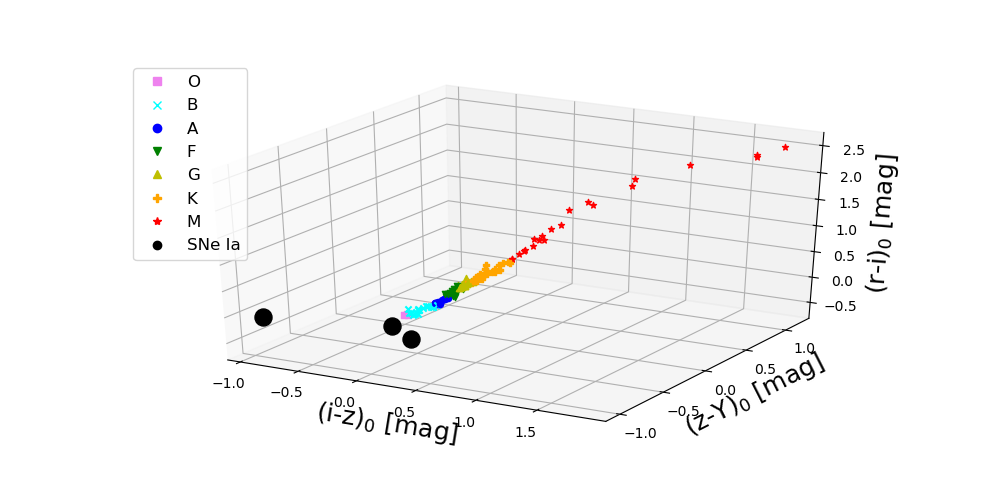

In [16]:
colorx = 'i-z'
colory = 'z-Y'
colorz = 'r-i'

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')

for spec_type in spectral_types:
    for si in colour_dict[spec_type]:
        color1 = colour_dict_ref[spec_type][si][colorx.lower()]
        color2 = colour_dict_ref[spec_type][si][colory.lower()]
        color3 = colour_dict_ref[spec_type][si][colorz.lower()]
        
        ax.scatter(color1,color2,color3,c=type_colors[spec_type],marker=type_markers[spec_type])
    ax.plot([],[],ls='',marker=type_markers[spec_type],color=type_colors[spec_type],label=spec_type)
    
for sn in sn_colour_dict.keys():
    color1_sn = sn_colour_dict_ref[sn][colorx.lower()]
    color2_sn = sn_colour_dict_ref[sn][colory.lower()]
    color3_sn = sn_colour_dict_ref[sn][colorz.lower()]
    
    ax.scatter(color1_sn,color2_sn,color3_sn,c='k',marker='o',s=150.0)
ax.plot([],[],ls='',marker='o',color='k',label='SNe Ia')

ax.set_xlabel('('+colorx+r'$)_0$ [mag]',fontsize=18)
ax.set_ylabel('('+colory+r'$)_0$ [mag]',fontsize=18)
ax.set_zlabel('('+colorz+r'$)_0$ [mag]',fontsize=18)
ax.legend(fontsize=12)

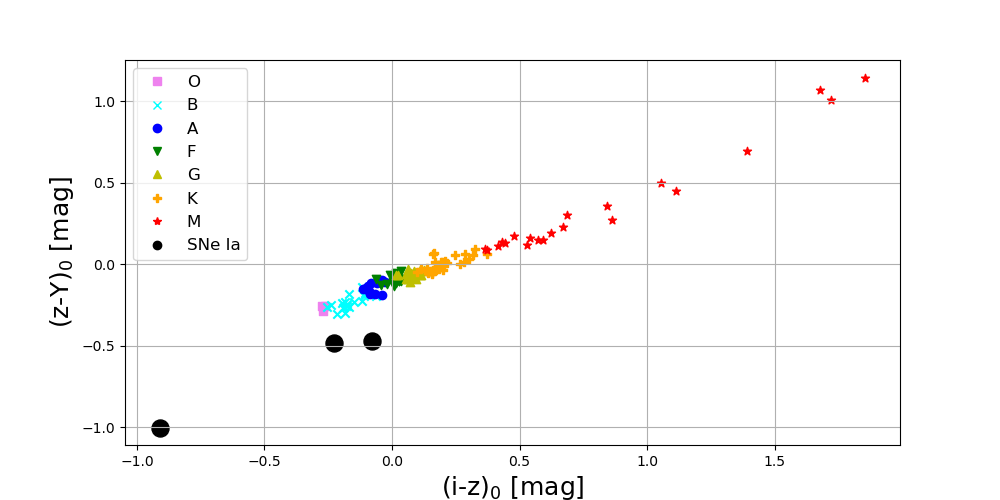

In [17]:
colorx = 'i-z'
colory = 'z-Y'

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

for spec_type in spectral_types:
    for si in colour_dict[spec_type]:
        color1 = colour_dict_ref[spec_type][si][colorx.lower()]
        color2 = colour_dict_ref[spec_type][si][colory.lower()]

        ax.scatter(color1,color2,c=type_colors[spec_type],marker=type_markers[spec_type])
        
    ax.plot([],[],ls='',marker=type_markers[spec_type],color=type_colors[spec_type],label=spec_type)
    
for sn in sn_colour_dict.keys():
    color1_sn = sn_colour_dict_ref[sn][colorx.lower()]
    color2_sn = sn_colour_dict_ref[sn][colory.lower()]
    
    ax.scatter(color1_sn,color2_sn,c='k',marker='o',s=150.0)
ax.plot([],[],ls='',marker='o',color='k',label='SNe Ia')

ax.grid()
ax.set_xlabel('('+colorx+r'$)_0$ [mag]',fontsize=18)
ax.set_ylabel('('+colory+r'$)_0$ [mag]',fontsize=18)
ax.legend(fontsize=12)

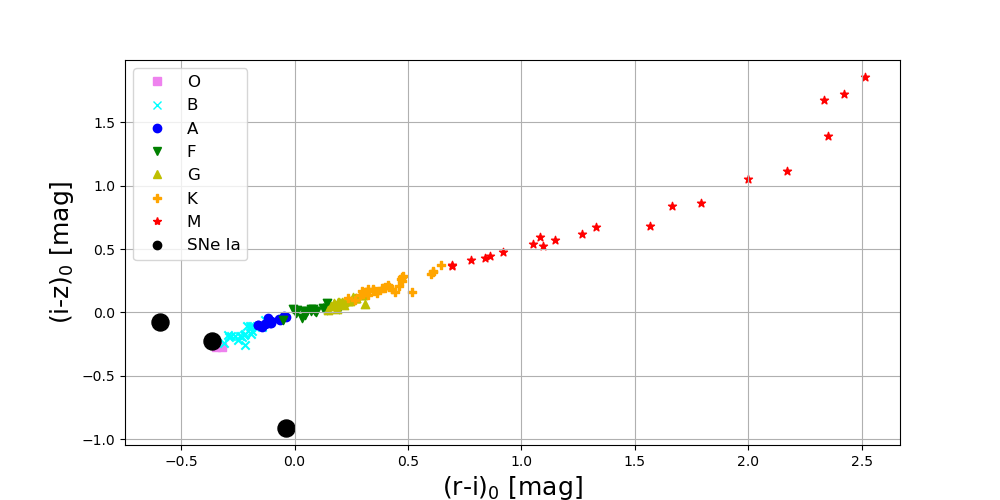

In [18]:
colorx = 'r-i'
colory = 'i-z'

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

for spec_type in spectral_types:
    for si in colour_dict[spec_type]:
        color1 = colour_dict_ref[spec_type][si][colorx.lower()]
        color2 = colour_dict_ref[spec_type][si][colory.lower()]

        ax.scatter(color1,color2,c=type_colors[spec_type],marker=type_markers[spec_type])
        
    ax.plot([],[],ls='',marker=type_markers[spec_type],color=type_colors[spec_type],label=spec_type)
    
for sn in sn_colour_dict.keys():
    color1_sn = sn_colour_dict_ref[sn][colorx.lower()]
    color2_sn = sn_colour_dict_ref[sn][colory.lower()]
    
    ax.scatter(color1_sn,color2_sn,c='k',marker='o',s=150.0)
ax.plot([],[],ls='',marker='o',color='k',label='SNe Ia')

ax.grid()
ax.set_xlabel('('+colorx+r'$)_0$ [mag]',fontsize=18)
ax.set_ylabel('('+colory+r'$)_0$ [mag]',fontsize=18)
ax.legend(fontsize=12)